In [2]:
pip install tensorflow

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp39-cp39-win_amd64.whl (266.3 MB)
  Using cached tensorflow_io_gcs_filesystem-0.27.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached termcolor-2.1.1-py3-none-any.whl (6.2 kB)
  Using cached flatbuffers-22.10.26-py2.py3-none-any.whl (26 kB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached grpcio-1.50.0-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd6

In [6]:
pip install opencv-python

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

import cv2
from PIL import Image

from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input


In [4]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join('./datasets','train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("khong doc duoc du lieu")

data = np.array(data)
labels = np.array(labels)


In [3]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(31367, 30, 30, 3) (31367,)
(7842, 30, 30, 3) (7842,)


In [6]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [7]:
print(y_train[2])
print(y_train_new[2])

2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [9]:
# inp= Input(shape=(30,30,3))
# cnn = Conv2D(filters=16,kernel_size=3,activation='relu')(inp)
# pooling=MaxPool2D(pool_size=(2,2)) (cnn)
# cnn = Conv2D(filters=32,kernel_size=3,activation='relu')(pooling)
# pooling=MaxPool2D(pool_size=(2,2)) (cnn)
# cnn = Conv2D(filters=64,kernel_size=3,activation='relu')(pooling)
# pooling=MaxPool2D(pool_size=(2,2)) (cnn)
# # cnn = Conv2D(filters=128,kernel_size=3,activation='relu')(pooling)
# # pooling=MaxPool2D(pool_size=(2,2)) (cnn)

# f=Flatten()(pooling)
# fc1 = Dense(units=256,activation='relu')(f)
# fc2 = Dense(units=128,activation='relu')(fc1)
# fc3 = Dense(units=64,activation='relu')(fc2)
# out = Dense(units=43,activation='softmax')(fc3)
# cnn =Model(inputs=inp,outputs=out)
# cnn.compile(optimizer  = 'adam', loss = 'categorical_crossentropy', 
#              metrics = ['accuracy']) 
# cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 30, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 64)          18496 

In [10]:
X_train_scaled = X_train / 255
X_test_scaled = X_test /255

In [11]:
history_model = model.fit(X_train_scaled, y_train_new, batch_size=32, epochs = 15,
                              validation_data=(X_test_scaled, y_test_new))

Epoch 1/15
981/981 [==============================] - 82s 81ms/step - loss: 1.1689 - accuracy: 0.6723 - val_loss: 0.2005 - val_accuracy: 0.9468
Epoch 2/15
981/981 [==============================] - 77s 79ms/step - loss: 0.2389 - accuracy: 0.9258 - val_loss: 0.0669 - val_accuracy: 0.9838
Epoch 3/15
981/981 [==============================] - 83s 85ms/step - loss: 0.1503 - accuracy: 0.9534 - val_loss: 0.0444 - val_accuracy: 0.9879
Epoch 4/15
981/981 [==============================] - 80s 81ms/step - loss: 0.1113 - accuracy: 0.9656 - val_loss: 0.0373 - val_accuracy: 0.9921
Epoch 5/15
981/981 [==============================] - 74s 76ms/step - loss: 0.1008 - accuracy: 0.9709 - val_loss: 0.0276 - val_accuracy: 0.9925
Epoch 6/15
981/981 [==============================] - 73s 74ms/step - loss: 0.0793 - accuracy: 0.9753 - val_loss: 0.0295 - val_accuracy: 0.9925
Epoch 7/15
981/981 [==============================] - 73s 75ms/step - loss: 0.0745 - accuracy: 0.9782 - val_loss: 0.0212 - val_accuracy:

In [12]:
y_pred = model.predict(X_test_scaled)

246/246 [==============================] - 4s 15ms/step


In [17]:
print(y_test[4])
print(np.argmax(y_pred[4]))

15
15


In [23]:
y_predd = []
for i in y_pred:
    y_predd.append(np.argmax(i))

In [24]:
def check(index):
    print(y_test[index], y_predd[index])

In [25]:
check(1)

15 15


In [26]:
print(classification_report(y_true = y_test, y_pred = y_predd))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.99      0.99       496
           2       1.00      1.00      1.00       450
           3       1.00      0.99      1.00       280
           4       0.99      1.00      1.00       418
           5       0.99      0.99      0.99       364
           6       1.00      0.98      0.99        59
           7       1.00      1.00      1.00       278
           8       1.00      0.99      0.99       301
           9       1.00      1.00      1.00       268
          10       0.99      1.00      0.99       370
          11       1.00      1.00      1.00       236
          12       1.00      1.00      1.00       450
          13       1.00      1.00      1.00       452
          14       1.00      1.00      1.00       162
          15       1.00      1.00      1.00       120
          16       1.00      1.00      1.00        90
          17       0.99    

In [45]:
list_label = {'Gioi han 20':0, 'Gioi han 30':1, 'Gioi han 50':2,
                        'Gioi han 60':3, 'Gioi han 70':4, 'Gioi han 80':5,
                        'Het gioi han toc do 80':6, 'Gioi han 100':7, 'Gioi han 120':8,
                        'Cam vuot nhau':9, 'Cam o to tai vuot':10, 'giao nhau vơi duong khong uu tien':11,
                        'Canh bao':12, 'Giao nhau voi duong uu tien':13, 'Dung lai':14,
                        'Duong cam':15, 'Cam oto tai':16, 'Cam di nguoc chieu':17,
                        'Cảnh Báo':18, 'Re trai':19, 'Re phai':20,
                        'Gấp khúc':21, 'Go ghe':22, 'Lật Xe':23,
                        'huong hep ben trai':24, 'Dang thi cong':25,
                        'Den giao thong':26, 'Nguoi sang duong':27,
                         'Co tre nho':28, 'Xe dap':29, 'Tuyet':30,
                         'Dong vat':31, 'Het cam':32, 'Duoc re phai':33,
                         'Duoc re trai':34, 'Duoc di thang':35, 'Duoc di thang va re phai':36,
                         'Duoc di thang va re trai':37, 'Di xien xuong':38, 'Xien xuong trai':39,
                         'Vong xuyen':40, 'Duoc vuot':41, 'Duoc oto tai vuot':42}

In [71]:
image = Image.open('./datasets/Test/00005.png')
image = image.resize([30, 30])
image = np.array(image)
pred = np.argmax(model.predict(image.reshape(1,30,30,3)))
print(pred)

1/1 [==============================] - 0s 43ms/step
38


Di xien xuong


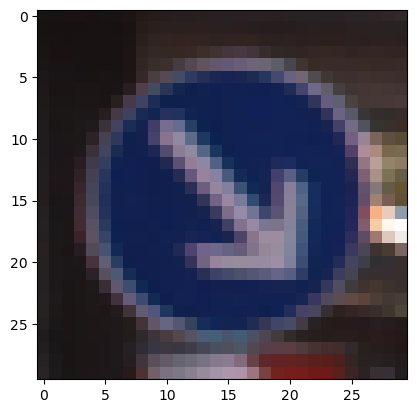

In [72]:
plt.imshow(image)
for key, value in list_label.items():
    if pred == value:
        print(key)

In [86]:
def tim_hieu_bien_bao(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (30,30))
    image = np.array(image, dtype='float32') / 255
    pred = np.argmax(model.predict(image.reshape(1,30,30,3))).flatten()
    plt.imshow(image)
    for key, value in list_label.items():
            if pred == value:
                print(key)

1/1 [==============================] - 0s 30ms/step
Di xien xuong


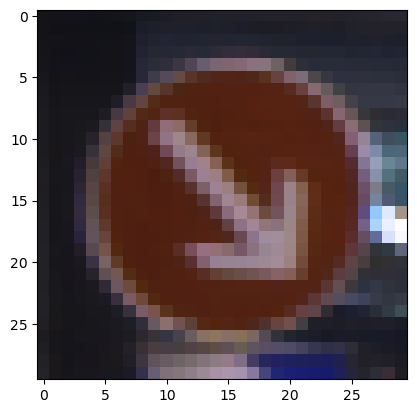

In [87]:
tim_hieu_bien_bao('./datasets/Test/00005.png')

In [79]:
tim_hieu_bien_so('./datasets/Test/00007.png')

ValueError: cannot reshape array of size 3168 into shape (1,30,30,3)

In [55]:
model.save('./classification_traffic_signs.h5')


In [56]:
# history_cnn = cnn.fit(X_train_scaled, y_train_new, batch_size=32, epochs = 15,
#                               validation_data=(X_test_scaled, y_test_new))

In [57]:
# y_pred_cnn = cnn.predict(X_test_scaled)

In [58]:
# y_predd_cnn = []
# for i in y_pred_cnn:
#     y_predd_cnn.append(np.argmax(i))

In [67]:
# print(classification_report(y_true = y_test, y_pred = y_predd_cnn))

In [88]:
import tkinter as tk

In [94]:
root = tk.Tk()
root.title("Tim Hieu Bien Bao Giao Thong")
btn=tk.Button(root, text="chon anh")
btn.pack()
tk.mainloop()

In [10]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy as np
from keras.models import load_model
import cv2
model = load_model('classification_traffic_signs.h5')

list_label = {'Gioi han 20':0, 'Gioi han 30':1, 'Gioi han 50':2,
                        'Gioi han 60':3, 'Gioi han 70':4, 'Gioi han 80':5,
                        'Het gioi han toc do 80':6, 'Gioi han 100':7, 'Gioi han 120':8,
                        'Cam vuot nhau':9, 'Cam o to tai vuot':10, 'giao nhau vơi duong khong uu tien':11,
                        'Canh bao':12, 'Giao nhau voi duong uu tien':13, 'Dung lai':14,
                        'Duong cam':15, 'Cam oto tai':16, 'Cam di nguoc chieu':17,
                        'Chú ý':18, 'Phải Re trai':19, 'Phải Re phai':20,
                        'ngoan ngheo':21, 'Go ghe':22, 'Lat xe':23,
                        'huong hep ben trai':24, 'Dang thi cong':25,
                        'Den giao thong':26, 'Nguoi sang duong':27,
                         'Co tre nho':28, 'Xe dap':29, 'Tuyet':30,
                         'Dong vat':31, 'Het cam':32, 'Duoc re phai':33,
                         'Duoc re trai':34, 'Duoc di thang':35, 'Duoc di thang va re phai':36,
                         'Duoc di thang va re trai':37, 'Di xien xuong':38, 'Xien xuong trai':39,
                         'Vong xuyen':40, 'Duoc vuot':41, 'Duoc oto tai vuot':42}

app=tk.Tk()
app.geometry('800x600')
app.title('Classification_traffic_signs')
app.configure(background='#CCC')
label=Label(app,background='#CCC')
sign_image = Label(app)

def classification(file_path):
    global label_packed
    image = cv2.imread(file_path)
    image = cv2.resize(image, (30,30))
    image = np.array(image, dtype='float32') / 255
    pred = np.argmax(model.predict(image.reshape(1,30,30,3))).flatten()
    for key, value in list_label.items():
            if pred == value:
                label.configure(foreground='white', text=key, font=('arial', 20, 'bold')) 
    
def show_classification_button(file_path):
    btn_classification=Button(app,text="Xem Tên Biển Báo", command=lambda: classification(file_path),padx=10,pady=5)
    btn_classification.configure(background='#000', foreground='white', font=('arial',10,'bold'))
    btn_classification.place(relx=0.79,rely=0.46)
    
def upload_image():
    try:
        file_path = filedialog.askopenfilename()
        img = cv2.imread(file_path)
#        img = Image.open(file_path)
        img = Image.fromarray(img)
        img_resize = img.resize((200,200))
        img_resize = ImageTk.PhotoImage(img_resize)
        sign_image.configure(image=img_resize)
        sign_image.image=img_resize
        show_classification_button(file_path)
    except:
        pass

upload=Button(app,text="Chọn Biển Báo",command=upload_image, padx=10, pady=5)
upload.configure(background='green', foreground='white', font=('arial',10,'bold'), relief="solid")

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(app, text="Phan loai bien bao",pady=20, font=('arial',20,'bold'))

heading.configure(background='#ccc')
heading.pack()
app.mainloop()